After pulling the data from the SQL database and investigating the results. The below SQL queries were used to extract the yearly averages. Firstly, second location condition to the city query had to be added as there are two Londons in the city_data(one in Canada the other in The UK) country = 'London'.
Secondly, the full records for both London and the Global level were only available for the years 1750-2013. So the year condition was also added.

SQL queries:

select year, avg_temp
from city_data
where  city = 'London' and country = 'United Kingdom' and year >= 1750

select * from global_data where year <= 2013

In [1]:
# As the the pulled data from the SQL data base is to be used in jupyter notebook two CSV files
# were uploaded to the folder

data_london = './Temperature_data/Lond.csv'
data_global = './Temperature_data/Global.csv'

In [2]:
#in order to easly access the data the below function is created. It will read data from
#the csv file and transorm it into the python data stracture 

def lists_maker(file_name):
    #initilizing the list in which data will be stored
    average_temp = []
    years = []
    file_name
    file_name.readline()
    for line in file_name:
        row = line.split(',')
        years.append(int(row[0]))
        average_temp.append(float(row[1]))
    file_name.close()
    #two seperate lists as a tuple are to be returned
    return (years, average_temp)



In [7]:
#the below function will calculate the moving average for any given time-perid)

def moving_average(name, cycle):
    years = name[0][cycle-1:]
    moving = []
    i = 0
    if cycle > len(years):
        print('Choose a shorter cycle')
    while cycle-1 + i< len(name[1]):
        moving.append(sum(name[1][0+i:cycle +i])/cycle)
        i +=1
    else:
        return years, moving

In [8]:
# oppening csv files in which data is stored
london = open(data_london,'r')
glob = open(data_global, 'r')

In [9]:
#transorming files into a python data stracture
london_yearly = lists_maker(london)
glob_yearly = lists_maker(glob)

In [10]:
#calculating moving averages 
years_london, moving_london = moving_average(london_yearly, 7)
years_glob, moving_glob = moving_average(glob_yearly, 7)

in below cells, few operations are performed to check if the functions work properly

In [11]:
len(years_london)

258

In [12]:
len(moving_london)


258

In [13]:
print(moving_london[0:4])

[9.110000000000001, 8.980000000000002, 8.817142857142859, 9.282857142857143]


In [14]:
print(moving_glob[-4:])

[9.56, 9.588571428571427, 9.56142857142857, 9.572857142857142]


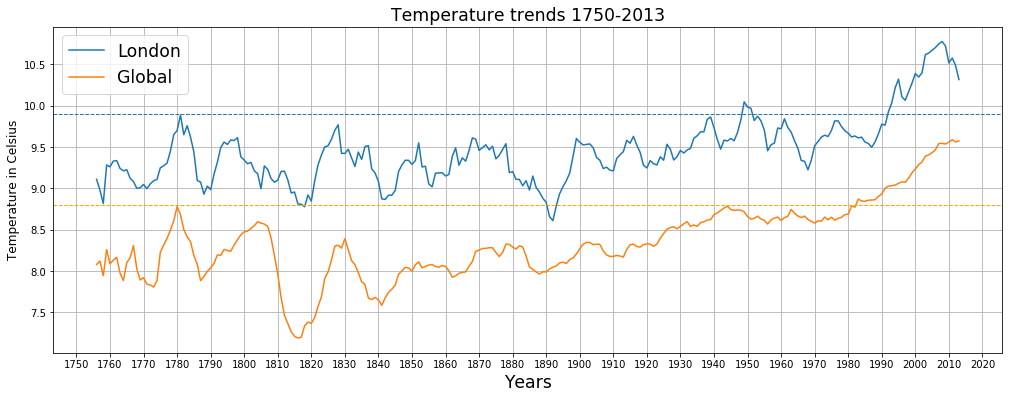

In [27]:
import pylab
decades = [1750 + x*10 for x in range(28)]
pylab.figure(figsize=(17,6))
pylab.plot(years_london, moving_london, label='London')
pylab.plot(years_glob, moving_glob, label='Global')
pylab.xticks(decades)
pylab.grid(True)
pylab.title('Temperature trends 1750-2013', fontsize ='xx-large')
pylab.xlabel('Years', fontsize ='xx-large')
pylab.ylabel('Temperature in Celsius', fontsize ='large')
pylab.legend(fontsize = 'xx-large')
pylab.axhline(y=9.9,ls='--', linewidth=1)
pylab.axhline(y=8.8,ls='--', linewidth=1, color='orange' )
pylab.show()


In general, the temperature in London is higher than the global average. Using the function defined in the cell below. It can be said that is on average 1.1 degree Celsius higher.



In [28]:
#function that takes as an input a list of floats
#and returns their simple arithmetic average"

def mean(data):        
    mean =  sum(data)/len(data)
    return mean

In [29]:
print(mean(moving_london)-mean(moving_glob))

1.103588039867109


Both on a global level and in London temperature reached a midterm peak for the around 1780. These levels were not retested till 1940's.
Even though there were dramatic rises in the temperature, for example in the 18th century, they were followed by equally rapid declines so as the result the temperature was mainly rangebound for most of the period.
However, in 1980's on the global level and 1990's in London, it can be said that the temperature firmly broke the 1780 peak and is steadily rising since then.

In [30]:
from math import sqrt
def stan_dev(data):
    "function used to calculate stnadard deviation"
    mean_data = mean(data)
    a=0
    for e in data:
        a = a + (e - mean_data)*(e - mean_data)
    variance = a/len(data)
    return sqrt(variance)
    

In [31]:

def cov(data1, data2):
    "function used to calculate covariance"
    a=0
    b=0
    ab=0
    mean1, mean2 = mean(data1), mean(data2)
    for i in range (len(data1)):
        a = data1[i] - mean1
        b = data2[i] - mean2
        ab += a*b
    covariance = ab/len(data1)
    return covariance

In [32]:
def correlation(data1, data2):
    correl = cov(data1,data2)/(stan_dev(data1)*stan_dev(data2))
    return correl
    

In [34]:
print(correlation(moving_london,moving_glob))


0.8412208251749484


The above correlation can suggest that the temperature in London and on a global level is highly positively correlated